<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 15, 2021

In [13]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [ ]:
#used describe function for data exploration
#df.describe(include = 'all')

In [ ]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [14]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)
display(df)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
#df.dropna(subset = ["Year"], inplace=True)
#df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
#df = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
#df = df[~df.Group.str.contains('By Year|By Total', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)


#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
#df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
#df['Year'] = df['Year'].astype(int, errors = 'raise')
#df['Month'] = df['Month'].astype(int, errors = 'raise')

#combine Year and Month into one column
#df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

#replace condition with ICD numerical codes?
df['Condition']=df['Condition'].str.replace('Adult respiratory distress syndrome','1.0')
df['Condition']=df['Condition'].str.replace('COVID-19','2.0')
df['Condition']=df['Condition'].str.replace('Cardiac arrest','3.0')
df['Condition']=df['Condition'].str.replace('Diabetes','4.0')
df['Condition']=df['Condition'].str.replace('Hypertensive diseases','5.0')
df['Condition']=df['Condition'].str.replace('Influenza and pneumonia','6.0')
df['Condition']=df['Condition'].str.replace('Ischemic heart disease','7.0')
df['Condition']=df['Condition'].str.replace('Renal failure','8.0')
df['Condition']=df['Condition'].str.replace('Respiratory failure','9.0')
df['Condition']=df['Condition'].str.replace('Sepsis','10.0')
df['Condition'] = df['Condition'].astype(float, errors = 'raise')

#df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', 
#                            columns=['Condition'])

#df = pd.get_dummies(df, prefix='AgeGroup', prefix_sep='.', 
#                            columns=['AgeGroup'])

df = df.reset_index(drop=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,ConditionGroup,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


,Condition,AgeGroup,CV19_Deaths
0,6.0,29.5,1999.0
1,6.0,39.5,5293.0
2,6.0,49.5,15615.0
3,6.0,59.5,39217.0
4,6.0,69.5,67238.0
...,...,...,...
29241,2.0,85.0,62.0
29242,2.0,85.0,23.0
29243,2.0,85.0,13.0
29244,2.0,85.0,25.0


In [ ]:
#import numpy as np

#table = df.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
#display(table)

#import numpy as np

#table2 = df.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', fill_value = 0)
#display(table)

#pd.set_option('precision', 0)
#df_single_level_cols = df.pivot_table(index=['Condition'],columns=['State','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Condition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adult respiratory distress syndrome,390,0,2390,616,5956,1211,280,10,2980,1292,0,95,612,842,280,183,477,1974,0,716,970,994,734,833,677,0,88,2388,0,3402,173,3504,828,42,2009,259,105,1967,230,809,86,837,4862,299,0,690,626,181,201,0
Alzheimer disease,168,0,372,215,2696,366,174,45,792,472,0,46,587,621,331,103,207,168,11,131,314,507,631,147,458,12,58,23,11,403,60,463,443,92,968,341,135,957,72,158,136,320,1711,78,0,192,328,50,428,0
COVID-19,10825,178,15946,6043,65426,6961,8161,1546,35494,17929,292,2034,22450,13583,6014,4878,7537,9625,833,10283,13499,18477,7617,7580,11279,1504,2783,5715,1216,24529,4041,25296,13970,1508,22986,8500,2596,28441,2565,9142,1837,13219,55829,2360,116,11090,5598,2802,8180,519
Cardiac arrest,1422,0,1666,498,18613,163,902,0,2732,2403,0,0,533,658,225,296,329,389,0,207,1610,903,76,685,371,0,98,1161,12,5090,136,5983,1113,21,1896,354,0,1880,108,584,18,779,3622,14,0,189,221,54,45,0
Cardiac arrhythmia,507,0,816,283,4625,492,387,27,2493,740,0,71,1679,1211,412,223,698,397,10,901,744,938,821,345,631,69,247,146,53,1552,34,1377,807,69,1426,651,145,2437,94,839,105,863,4403,65,0,584,355,107,786,24
Cerebrovascular diseases,265,0,384,123,3164,305,204,22,1716,633,0,51,787,638,201,126,265,335,0,608,384,728,466,247,437,10,89,61,18,900,22,769,540,34,1122,397,67,1398,34,384,58,567,2490,15,0,327,139,13,416,0
Chronic lower respiratory diseases,632,0,985,397,4170,669,650,0,4381,974,0,122,2753,1580,510,325,798,561,0,899,912,1402,918,592,741,176,238,228,72,1233,184,1630,998,123,1898,1054,148,2355,167,756,172,1048,3946,80,0,627,399,204,1124,41
Diabetes,960,0,2196,659,14561,901,706,93,6882,1990,0,162,5517,1935,744,425,1266,1344,0,1809,994,1894,1351,1233,921,202,331,576,58,2467,506,2271,1501,122,2467,2014,252,3225,170,1038,264,1614,11045,185,0,968,796,207,1565,10
Heart failure,522,0,682,327,4298,500,614,24,1812,1031,0,114,2110,1177,483,263,702,543,11,669,1067,1213,919,645,685,50,203,142,40,1277,52,1413,937,128,1738,687,183,2373,189,725,164,778,3955,125,0,672,443,149,953,0


In [ ]:
#find a way to stack the dummy variable columns and then find a way to use corr for the 3 variables CVDeaths, AgeGroup(stacked) and Condition(Stacked)

#pd.set_option('precision', 0)
#df_single_level_cols = ndf.pivot_table(index=['Condition'],columns=['Condition','AgeGroup'], values='CV19_Deaths',fill_value = 0)
#df_single_level_cols.stack()
#display(df_single_level_cols)

#s2 = pd.Series(dummies.columns[np.where(dummies!=0)[1]])

KeyError: ignored

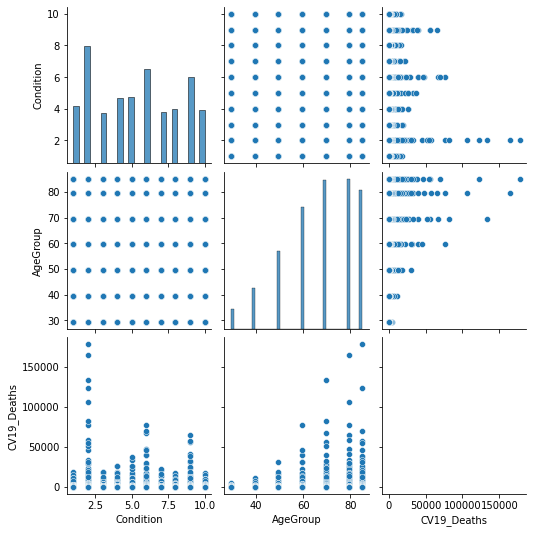

In [15]:
#use seaborn pairplot to show correlation
import seaborn as sns

sns.pairplot(df)

In [16]:
#use corr() function to show correlation
corr = df.corr()

display(corr)

,Condition,AgeGroup,CV19_Deaths
Condition,1.000000,0.058332,-0.027993
AgeGroup,0.058332,1.000000,0.044309
CV19_Deaths,-0.027993,0.044309,1.000000


In [17]:
#combined data set
import numpy as np
print(df.corr().abs().nlargest(3, 'CV19_Deaths').index)
print(df.corr().abs().nlargest(3, 'CV19_Deaths').values[:13])

Index(['CV19_Deaths', 'AgeGroup', 'Condition'], dtype='object')
[[0.02799267 0.04430923 1.        ]
 [0.05833189 1.         0.04430923]
 [1.         0.05833189 0.02799267]]


Text(0, 0.5, 'CV19_Deaths')

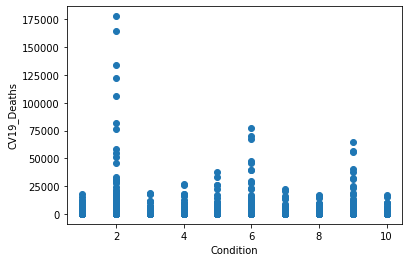

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['Condition'], df['CV19_Deaths'], marker='o')
plt.xlabel('Condition')
plt.ylabel('CV19_Deaths')

Text(0, 0.5, 'CV19_Deaths')

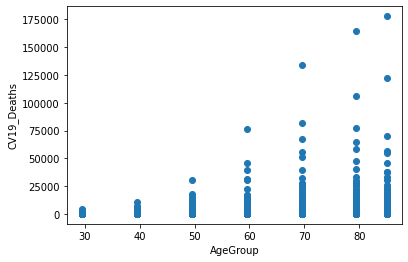

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['AgeGroup'], df['CV19_Deaths'], marker='o')
plt.xlabel('AgeGroup')
plt.ylabel('CV19_Deaths')

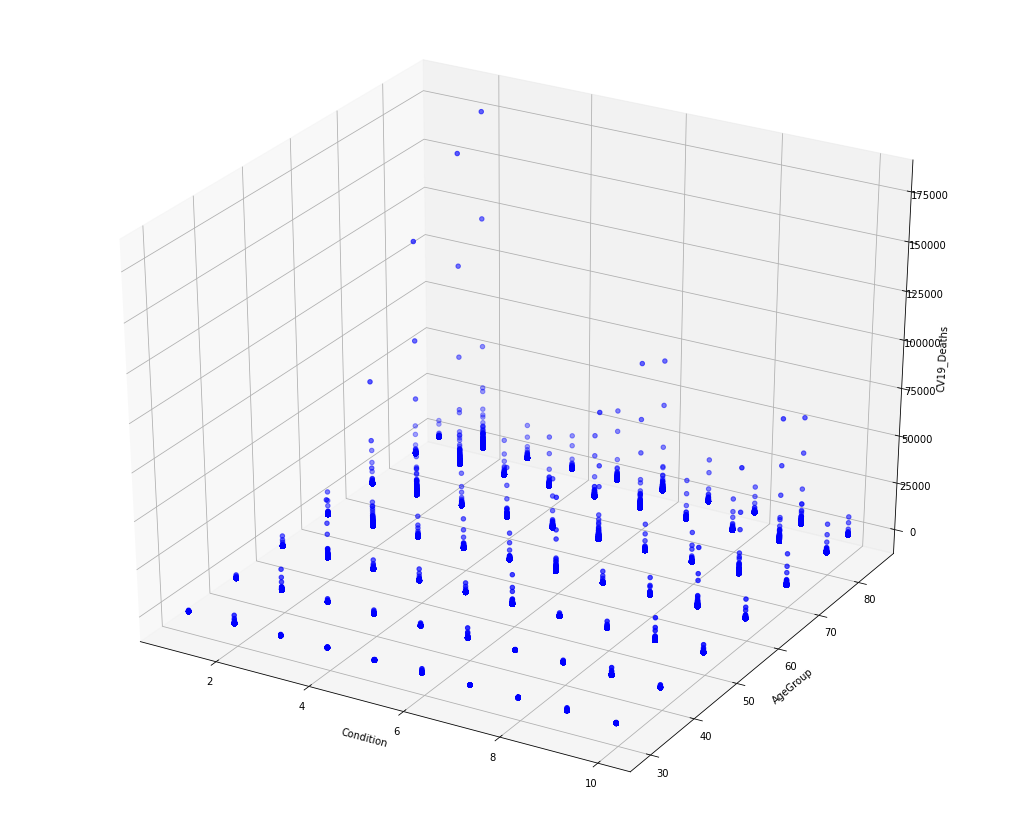

In [20]:
#3d rendering of colums with high correlation
import numpy as np

%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Condition'],
          df['AgeGroup'],
          df['CV19_Deaths'],
          c='b')

ax.set_xlabel("Condition")
ax.set_ylabel("AgeGroup")
ax.set_zlabel("CV19_Deaths")
plt.show()


In [21]:
##Create data frames to split the data
x = pd.DataFrame(np.c_[df['Condition'], df['AgeGroup']], columns = ['Condition','AgeGroup'])
y = df['CV19_Deaths']

#import train_test_split function and assign 30% of data for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

#print shape of train sets
print(x_train.shape)
print(y_train.shape)

(20472, 2)
(20472,)


In [22]:
#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(8774, 2)
(8774,)


In [23]:
#build the LinearRegression model and fit the train sets
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#print the incercept and data frame showing coefficient
print(model.intercept_)

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

-61.39451313240687


,Coeff
Condition,-33.067581
AgeGroup,8.507850


Text(0.5, 1.0, 'Actual vs Predicted')

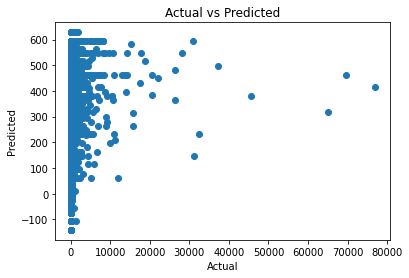

In [25]:
#make CV-19 Deaths prediction and compare with actual values

pred = model.predict(x_test)

plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

(array([8.726e+03, 2.900e+01, 8.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([ -618.70516183,  7094.90794621, 14808.52105425, 22522.13416228,
        30235.74727032, 37949.36037836, 45662.9734864 , 53376.58659443,
        61090.19970247, 68803.81281051, 76517.42591855]),
 <a list of 10 Patch objects>)

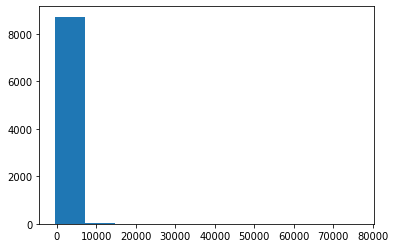

In [26]:
#plot difference between actual values and predicted values
plt.hist(y_test - pred)

In [27]:
#calculate MSE and R-Squared
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
print('Mean Squared Error:', mse)

print('R-Squared: %.4f' % model.score(x_test,y_test))

Mean Squared Error: 3667707.121683082
R-Squared: 0.0031


In [28]:
print(model.predict([[2.0, 85.0]]))

[595.63758083]


In [29]:
#Begin Logistic model - Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [30]:
#begin data cleansing

df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', 
                            columns=['Condition'], drop_first=True)

df = df.reset_index(drop=True)
display(df)

,AgeGroup,CV19_Deaths,Condition.COVID-19,Condition.Cardiac arrest,Condition.Diabetes,Condition.Hypertensive diseases,Condition.Influenza and pneumonia,Condition.Ischemic heart disease,Condition.Renal failure,Condition.Respiratory failure,Condition.Sepsis
0,29.5,1999.0,0,0,0,0,1,0,0,0,0
1,39.5,5293.0,0,0,0,0,1,0,0,0,0
2,49.5,15615.0,0,0,0,0,1,0,0,0,0
3,59.5,39217.0,0,0,0,0,1,0,0,0,0
4,69.5,67238.0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29241,85.0,62.0,1,0,0,0,0,0,0,0,0
29242,85.0,23.0,1,0,0,0,0,0,0,0,0
29243,85.0,13.0,1,0,0,0,0,0,0,0,0
29244,85.0,25.0,1,0,0,0,0,0,0,0,0


In [31]:
#show columns in data frame
print(df.columns)

Index(['AgeGroup', 'CV19_Deaths', 'Condition.COVID-19',
       'Condition.Cardiac arrest', 'Condition.Diabetes',
       'Condition.Hypertensive diseases', 'Condition.Influenza and pneumonia',
       'Condition.Ischemic heart disease', 'Condition.Renal failure',
       'Condition.Respiratory failure', 'Condition.Sepsis'],
      dtype='object')


In [32]:
#split the data and assign to variables
x = pd.DataFrame(np.c_[df['AgeGroup'], df['Condition.COVID-19'], df['Condition.Diabetes'], df['Condition.Influenza and pneumonia'],],
                       columns = ['AgeGroup','Condition.COVID-19','Condition.Diabetes','Condition.Influenza and pneumonia'])
y = df['CV19_Deaths']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)


In [33]:
#print shape of train sets
print(x_train.shape)
print(y_train.shape)

#print shape of test sets
print(x_test.shape)
print(y_test.shape)

(24859, 4)
(24859,)
(4387, 4)
(4387,)


In [34]:
#Apply standardscaler function
from sklearn.preprocessing import StandardScaler


# Create an instance of the scaler and apply it to the data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)


In [35]:
#import LogisticRegression function and fit to the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

#assign x test set to new variable for prediction
pred = model.predict(x_test)

KeyboardInterrupt: ignored

In [ ]:
#import functions to show accuracy of model
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print(acc)
print(cm)


0.04444950991565991
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Joseph S Lopez
Week 6

In [27]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [28]:
#begin data cleansing

df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths', 'Condition Group': 'ConditionGroup'}, inplace=True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#drop non-relevant columns - Added Group, Year?, Month?, State?
df.drop(['Data As Of', 'Start Date', 'End Date', 'Year', 'Month', 'State', 'Group', 'ConditionGroup', 'ICD10_codes', 'Number of Mentions', 'Flag'], axis=1, inplace=True)

#remove all non-relevant values from State column
df = df[~df.AgeGroup.str.contains('Not stated|All Ages', regex=True)]

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#newly added
row_index = df[df['Condition'] == 'Chronic lower respiratory diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the circulatory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Other diseases of the respiratory system'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Heart failure'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cardiac arrhythmia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Malignant neoplasms'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Vascular and unspecified dementia'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Cerebrovascular diseases'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Obesity'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Alzheimer disease'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Intentional and unintentional injury, poisoning, and other adverse events'].index
df.drop(row_index, inplace = True)
row_index = df[df['Condition'] == 'Respiratory arrest'].index
df.drop(row_index, inplace = True)
row_index = df[df['AgeGroup'] == '0-24'].index
df.drop(row_index, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')

#replace string values with midpoint values of type float
df['AgeGroup']=df['AgeGroup'].str.replace('25-34','29.5')
df['AgeGroup']=df['AgeGroup'].str.replace('35-44','39.5')
df['AgeGroup']=df['AgeGroup'].str.replace('45-54','49.5')
df['AgeGroup']=df['AgeGroup'].str.replace('55-64','59.5')
df['AgeGroup']=df['AgeGroup'].str.replace('65-74','69.5')
df['AgeGroup']=df['AgeGroup'].str.replace('75-84','79.5')
df['AgeGroup']=df['AgeGroup'].str.replace('+','')
df['AgeGroup'] = df['AgeGroup'].astype(float, errors = 'raise')

df['Condition']=df['Condition'].str.replace('Adult respiratory distress syndrome','1.0')
df['Condition']=df['Condition'].str.replace('COVID-19','2.0')
df['Condition']=df['Condition'].str.replace('Cardiac arrest','3.0')
df['Condition']=df['Condition'].str.replace('Diabetes','4.0')
df['Condition']=df['Condition'].str.replace('Hypertensive diseases','5.0')
df['Condition']=df['Condition'].str.replace('Influenza and pneumonia','6.0')
df['Condition']=df['Condition'].str.replace('Ischemic heart disease','7.0')
df['Condition']=df['Condition'].str.replace('Renal failure','8.0')
df['Condition']=df['Condition'].str.replace('Respiratory failure','9.0')
df['Condition']=df['Condition'].str.replace('Sepsis','10.0')
df['Condition'] = df['Condition'].astype(float, errors = 'raise')

#df = pd.get_dummies(df, prefix='Condition', prefix_sep='.', columns=['Condition'], drop_first=True)

df = df.reset_index(drop=True)
display(df)

,Condition,AgeGroup,CV19_Deaths
0,6.0,29.5,1999.0
1,6.0,39.5,5293.0
2,6.0,49.5,15615.0
3,6.0,59.5,39217.0
4,6.0,69.5,67238.0
...,...,...,...
29241,2.0,85.0,62.0
29242,2.0,85.0,23.0
29243,2.0,85.0,13.0
29244,2.0,85.0,25.0


In [30]:
#split the data and assign to variables
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

x = pd.DataFrame(np.c_[df['AgeGroup'], df['Condition'],], columns = ['AgeGroup','Condition'])
y = df['CV19_Deaths']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state=109)

In [31]:
#from sklearn import svm
#svm_model = svm.SVC(kernel='linear')
#svm_model.fit(x_train, y_train)
#y_pred = svm_model.predict(x_test)

from sklearn import svm

points = df[['AgeGroup', 'Condition']].values
result = df['CV19_Deaths']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors =',clf.support_vectors_)
print('Number of support vector for each class =', clf.n_support_)
print('Coefficients of the support vector in the decision function =',np.abs(clf.dual_coef_))

Vector of weights (w) =  [0.00000000e+00 1.42108547e-14]
b =  0.9999999999996604
Indices of support vectors = [[39.5  6. ]
 [69.5  6. ]
 [79.5  6. ]
 ...
 [69.5  2. ]
 [79.5  2. ]
 [85.   2. ]]
Number of support vector for each class = [36 13  7 ...  1  1  1]
Coefficients of the support vector in the decision function = [[0.         0.         0.         ... 1.         1.         0.51647012]
 [0.         0.         0.         ... 1.         1.         0.0661157 ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 ...
 [0.         0.         0.         ... 0.00832466 0.0661157  1.        ]
 [0.         0.         0.         ... 0.02       0.02       0.00832466]
 [0.         0.         0.         ... 0.00832466 0.0661157  0.0661157 ]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


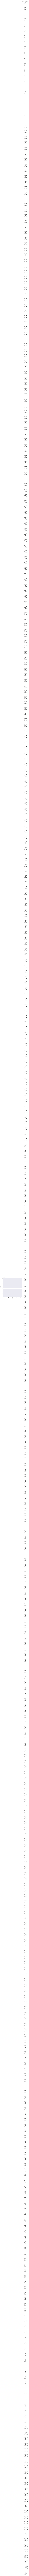

In [35]:
#from sklearn import metrics
#print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

w = clf.coef_[0]

slope = -w[0] / w[1]

b = clf.intercept_[0]

xx = np.linspace(0 , 4)
yy = slope * xx - (b / w[1])

s = clf.support_vectors_[0]
yy_down = slope * xx + (s[1] - slope * s[0])

s = clf.support_vectors_[-1]
yy_up = slope * xx + (s[1] - slope * s[0])

sns.lmplot('AgeGroup', 'Condition', data=df, hue='CV19_Deaths', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='green');

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [17]:
print("Precision: ",metrics.precision_score(y_test, y_pred,pos_label='positive', average='micro'))

print("Recall: ",metrics.recall_score(y_test, y_pred,pos_label='positive', average='micro'))

Precision:  0.03735361996751859
Recall:  0.03735361996751859


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
